In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from os import path

In [6]:
DATAFOLDER_RAW = path.join('data', 'raw')
DATAFOLDER_COVID = path.join('COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series')

DATASET_HEALTHCARE = path.join('annual-healthcare-expenditure-per-capita.csv')
DATASET_GDP = path.join('API_NY.GDP.PCAP.CN_DS2_en_csv_v2_866999.csv')
DATASET_65UP_FEMALE = path.join('API_SP.POP.65UP.FE.IN_DS2_en_csv_v2_881748.csv')
DATASET_65UP_MALE = path.join('API_SP.POP.65UP.MA.IN_DS2_en_csv_v2_871408.csv')
DATASET_65UP = path.join('API_SP.POP.65UP.TO_DS2_en_csv_v2_868250.csv')
DATASET_HEALTH_INDEX = path.join('health-index.csv')
DATASET_HUMAN_INDEX = path.join('human-development-index.csv')
DATASET_SCHOLL = path.join('mean-years-of-schooling-long-run.csv')
DATASET_COVID = 'time_series_19-covid-Confirmed.csv'

# Load the main dataset: the covid dataset

In [7]:
data = pd.read_csv(path.join(DATAFOLDER_RAW, DATAFOLDER_COVID, DATASET_COVID))
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  327 non-null    object 
 1   Country/Region  501 non-null    object 
 2   Lat             501 non-null    float64
 3   Long            501 non-null    float64
 4   1/22/20         501 non-null    int64  
 5   1/23/20         501 non-null    int64  
 6   1/24/20         501 non-null    int64  
 7   1/25/20         501 non-null    int64  
 8   1/26/20         501 non-null    int64  
 9   1/27/20         501 non-null    int64  
 10  1/28/20         501 non-null    int64  
 11  1/29/20         501 non-null    int64  
 12  1/30/20         501 non-null    int64  
 13  1/31/20         501 non-null    int64  
 14  2/1/20          501 non-null    int64  
 15  2/2/20          501 non-null    int64  
 16  2/3/20          501 non-null    int64  
 17  2/4/20          501 non-null    int

In [9]:
data.shape

(501, 66)

Number o countries

In [10]:
data['Country/Region'].unique().shape

(183,)

Group countries together

In [11]:
data.groupby(by='Country/Region').agg(['sum'])

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.0000,65.0000,0,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40.0
Albania,0,41.1533,20.1683,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,89.0
Algeria,0,28.0339,1.6596,0,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,201.0
Andorra,0,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,113.0
Angola,0,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,41.3775,64.5853,0,0,0,0,0,0,0,...,0,1,6,10,15,23,33,43,43,43.0
Venezuela,0,6.4238,-66.5897,0,0,0,0,0,0,0,...,2,10,17,33,36,42,42,70,70,70.0


Check it is true

In [12]:
id = data['Country/Region'] == 'China'

In [13]:
data['Country/Region'][id]

154    China
158    China
159    China
160    China
161    China
162    China
163    China
164    China
166    China
167    China
168    China
169    China
171    China
172    China
173    China
174    China
175    China
176    China
177    China
178    China
179    China
180    China
181    China
182    China
183    China
184    China
185    China
187    China
188    China
189    China
193    China
194    China
202    China
Name: Country/Region, dtype: object

Number of days

In [14]:
days = data.columns.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
days

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [15]:
days.shape

(62,)

## See data as a time Series

In [16]:
data_by_country = data.groupby(by='Country/Region').agg(['sum'])

In [17]:
# data_by_country.droplevel('sum', axis=1)

In [18]:
x = data_by_country.loc['China'].drop(['Lat', 'Long', 'Province/State'])
x.head()

1/22/20  sum     548
1/23/20  sum     643
1/24/20  sum     920
1/25/20  sum    1406
1/26/20  sum    2075
Name: China, dtype: object

In [19]:
date = pd.DataFrame(data=x.index.tolist(), columns=['date', 'fat']).drop('fat', axis=1)
date.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [20]:
datetime.strptime(date.iloc[0].date, '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [21]:
date = date.applymap(lambda x: datetime.strptime(x, '%m/%d/%y'))
date.head()

,date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [22]:
number_of_deaths = pd.DataFrame(x.values, columns=['deaths'])

In [23]:
day = np.arange(1, number_of_deaths.shape[0], 1)
day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [24]:
days_df = pd.DataFrame(day, columns=['day'])
days_df.head()

,day
0,1
1,2
2,3
3,4
4,5


In [25]:
deaths_time_series = pd.concat([days_df, date, number_of_deaths], axis=1)
deaths_time_series.head()

,day,date,deaths
0,1.0,2020-01-22,548
1,2.0,2020-01-23,643
2,3.0,2020-01-24,920
3,4.0,2020-01-25,1406
4,5.0,2020-01-26,2075


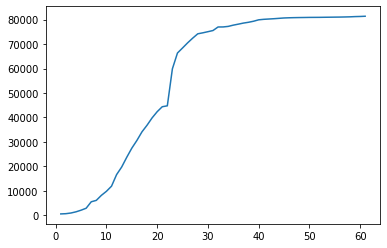

In [26]:
plt.plot(deaths_time_series.day, deaths_time_series.deaths)

### Create a function to do it

In [27]:
dayone='1/22/20'
dayone = datetime.strptime(dayone, '%m/%d/%y')
day = np.arange(1, (datetime.today() - dayone).days + 2, 1)

In [28]:
headers = data['Country/Region'].unique().tolist()
headers.sort()
headers.append('day')
headers.insert(0, headers.pop(-1))

In [29]:
base = datetime.today()
date_list = [datetime.strftime(base - timedelta(days=x), '%m/%d/%y')  for x in range((datetime.today() - dayone).days + 1)]
date_list.sort()
deaths_df = pd.DataFrame(index=date_list, columns=headers)
deaths_df['day'] = day
deaths_df.tail()

,day,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
03/20/20,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/21/20,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/22/20,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/23/20,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/24/20,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [31]:
deaths_df.shape

(63, 184)

In [32]:
day.shape

(63,)

In [33]:
def get_deaths(data, country='China'):
    data_by_country = data.groupby(by='Country/Region').agg(['sum'])
    # remove unnecessary stuff
    buffer = data_by_country.loc[country].drop(['Lat', 'Long', 'Province/State'])
    # get the number of deathes into an array
    deaths = buffer.values
    # put the dates into an dataframe
    dates = pd.DataFrame(data=buffer.index.tolist(), columns=['date', 'sum']).drop('sum', axis=1)
    # turn the dates into a Datetime object
    dates = dates.applymap(lambda x: datetime.strptime(x, '%m/%d/%y'))
    # turn the dates into a proper string format
    dates = dates.applymap(lambda x: datetime.strftime(x, '%m/%d/%y'))

    return deaths, dates.values.reshape(-1)

def create_death_dataframe(data, dayone='1/22/20'):
    for country in data['Country/Region'].unique():
        print('Taking data from country: {}'.format(country))
        number_of_deaths, dates = get_deaths(data, country)
    
        deaths_df[country].loc[dates] = number_of_deaths
    
    
    return deaths_df

In [34]:
deaths_df = create_death_dataframe(data)
deaths_df.head()

Taking data from country: Thailand
Taking data from country: Japan


/Users/navarmn/Work/Projects/venvs/tensorflow-2.0/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Taking data from country: Singapore
Taking data from country: Nepal
Taking data from country: Malaysia
Taking data from country: Canada
Taking data from country: Australia
Taking data from country: Cambodia
Taking data from country: Sri Lanka
Taking data from country: Germany
Taking data from country: Finland
Taking data from country: United Arab Emirates
Taking data from country: Philippines
Taking data from country: India
Taking data from country: Italy
Taking data from country: Sweden
Taking data from country: Spain
Taking data from country: Belgium
Taking data from country: Egypt
Taking data from country: Lebanon
Taking data from country: Iraq
Taking data from country: Oman
Taking data from country: Afghanistan
Taking data from country: Bahrain
Taking data from country: Kuwait
Taking data from country: Algeria
Taking data from country: Croatia
Taking data from country: Switzerland
Taking data from country: Austria
Taking data from country: Israel
Taking data from country: Pakistan


,day,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
01/22/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01/23/20,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
01/24/20,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
01/25/20,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
01/26/20,5,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,2,0,0


In [36]:
deaths_df['Italy']

01/22/20        0
01/23/20        0
01/24/20        0
01/25/20        0
01/26/20        0
            ...  
03/20/20    47021
03/21/20    53578
03/22/20    59138
03/23/20    59138
03/24/20      NaN
Name: Italy, Length: 63, dtype: object